In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 讀入 IMDB 電影數據庫

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)  #選「最常用」的1萬字，超過這範圍就當作不存在

In [5]:
print('訓練總筆數:', len(x_train))
print('測試總筆數:', len(x_test))

訓練總筆數: 25000
測試總筆數: 25000


### 資料為list，而不是array，因為每筆資料(每段影評)長度是不一樣的

In [6]:
len(x_train[24999]),len(x_train[9487]) #檢查一下

(153, 104)

### 最後要說明的是, 在每筆輸入資料的數字都代表英文的一個單字。編號方式是在我們資料庫裡所有文字的排序: 也就是出現頻率越高, 代表的數字就越小。

In [7]:
x_train[24999]

[1,
 17,
 6,
 194,
 337,
 7,
 4,
 204,
 22,
 45,
 254,
 8,
 106,
 14,
 123,
 4,
 2,
 270,
 2,
 5,
 2,
 2,
 732,
 2098,
 101,
 405,
 39,
 14,
 1034,
 4,
 1310,
 9,
 115,
 50,
 305,
 12,
 47,
 4,
 168,
 5,
 235,
 7,
 38,
 111,
 699,
 102,
 7,
 4,
 4039,
 9245,
 9,
 24,
 6,
 78,
 1099,
 17,
 2345,
 2,
 21,
 27,
 9685,
 6139,
 5,
 2,
 1603,
 92,
 1183,
 4,
 1310,
 7,
 4,
 204,
 42,
 97,
 90,
 35,
 221,
 109,
 29,
 127,
 27,
 118,
 8,
 97,
 12,
 157,
 21,
 6789,
 2,
 9,
 6,
 66,
 78,
 1099,
 4,
 631,
 1191,
 5,
 2642,
 272,
 191,
 1070,
 6,
 7585,
 8,
 2197,
 2,
 2,
 544,
 5,
 383,
 1271,
 848,
 1468,
 2,
 497,
 2,
 8,
 1597,
 8778,
 2,
 21,
 60,
 27,
 239,
 9,
 43,
 8368,
 209,
 405,
 10,
 10,
 12,
 764,
 40,
 4,
 248,
 20,
 12,
 16,
 5,
 174,
 1791,
 72,
 7,
 51,
 6,
 1739,
 22,
 4,
 204,
 131,
 9]

### 輸出方面看看前 10 筆。結果是 0 (負評) 或 1 (正評)。

In [8]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

### 送入神經網路的輸入處理
* 設輸入文字長度的上限
* 把每段文字都弄成一樣長, 太短的後面補上 0

In [9]:
from keras.preprocessing import sequence

In [10]:
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)

In [11]:
x_train.shape

(25000, 150)

## 建造RNN
* 先將 10000 維的文字壓到 N 維
* 然後用 K 個 LSTM 神經元做隱藏層
* 最後一個 output, 直接用 sigmoid 送出 

文字我們用 1-hot 表示是很標準的方式, 不過要注意的是, 因為我們指定要 1 萬個字, 所以每個字是用 1 萬維的向量表示! 這一來很浪費記憶空間, 二來字和字間基本上是沒有關係的。我們可以用某種「合理」的方式, 把字壓到比較小的維度, 這些向量又代表某些意思 (比如說兩個字代表的向量角度小表相關程度大) 等等。聽來很複雜的事叫 "word embedding", 而事實上 Keras 會幫我們做。我們只需告訴 Keras 原來最大的數字是多少 (10000), 還有我們打算壓到幾維 (N)。

## $$上課Model$$

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

### 將文字更改壓成10維，及5個神經元

In [13]:
N = 3 # 文字要壓到 N 維
K = 4 # LSTM 有 K 個神經元

In [14]:
model = Sequential()

In [15]:
model.add(Embedding(10000, N))  ##將10000文字壓到N維

### LSTM 層, 我們做 K 個 LSTM Cells。

In [16]:
model.add(LSTM(K))

### 單純透過 sigmoid 輸出。

In [17]:
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


In [19]:
(7*4+4)*4    ##input有3維文字+K個神經元回傳(3+4=7)，一個神經元內共有4個參數及4個Bais(7*4+4=32)，最後在乘上神經元個數(32*4=128)

128

In [20]:
model.fit(x_train, y_train,
         batch_size=32,
         epochs=5, 
         verbose=1, 
         validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 195s 8ms/step - loss: 0.5012 - acc: 0.7584 - val_loss: 0.3641 - val_acc: 0.8527
Epoch 2/5
25000/25000 [==============================] - 195s 8ms/step - loss: 0.2938 - acc: 0.8880 - val_loss: 0.3644 - val_acc: 0.8463
Epoch 3/5
25000/25000 [==============================] - 203s 8ms/step - loss: 0.2284 - acc: 0.9189 - val_loss: 0.3616 - val_acc: 0.8550
Epoch 4/5
25000/25000 [==============================] - 203s 8ms/step - loss: 0.1955 - acc: 0.9330 - val_loss: 0.3566 - val_acc: 0.8554
Epoch 5/5
25000/25000 [==============================] - 199s 8ms/step - loss: 0.1669 - acc: 0.9456 - val_loss: 0.3842 - val_acc: 0.8553


In [21]:
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

25000/25000 [==============================] - 32s 1ms/step
測試資料的 loss = 0.3841831139278412
測試資正確率 = 0.85532


## $$更改參數後的Model_1$$

### model_1 更改文字壓縮維數，更改成10維，並且將神經元個數增加至10個

In [22]:
N = 10 # 文字要壓到 N 維
K = 10 # LSTM 有 K 個神經元

model_1 = Sequential()
model_1.add(Embedding(10000, N))  
model_1.add(LSTM(K)) 
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 100,851
Trainable params: 100,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
(20*4+4)*10   ##input有10維文字+K個神經元回傳(10+10+20)，一個神經元內共有4個參數及4個Bais(20*4+4=84)，最後在乘上神經元個數(84*10=840)

840

### 增加epochs次數為10次

In [24]:
model_1_5=model_1.fit(x_train, y_train,
                 batch_size=32,
                 epochs=10, 
                 verbose=1, 
                 validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 194s 8ms/step - loss: 0.4247 - acc: 0.7969 - val_loss: 0.3233 - val_acc: 0.8624
Epoch 2/10
25000/25000 [==============================] - 190s 8ms/step - loss: 0.2441 - acc: 0.9062 - val_loss: 0.3532 - val_acc: 0.8518
Epoch 3/10
25000/25000 [==============================] - 190s 8ms/step - loss: 0.1916 - acc: 0.9304 - val_loss: 0.3618 - val_acc: 0.8575
Epoch 4/10
25000/25000 [==============================] - 190s 8ms/step - loss: 0.1572 - acc: 0.9444 - val_loss: 0.4173 - val_acc: 0.8497
Epoch 5/10
25000/25000 [==============================] - 191s 8ms/step - loss: 0.1270 - acc: 0.9574 - val_loss: 0.4477 - val_acc: 0.8492
Epoch 6/10
25000/25000 [==============================] - 189s 8ms/step - loss: 0.1100 - acc: 0.9642 - val_loss: 0.4987 - val_acc: 0.8458
Epoch 7/10
25000/25000 [==============================] - 190s 8ms/step - loss: 0.0949 - acc: 0.9686 - val_loss: 0.5047 - 

In [25]:
score=model_1.evaluate(x_test,y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1]*100)

25000/25000 [==============================] - 30s 1ms/step
測試資料的 loss: 0.6012237342357636
測試資料正確率: 83.64


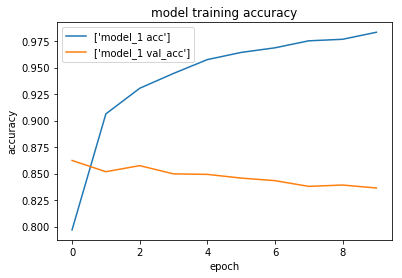

In [26]:
plt.plot(model_1_5.history['acc'])
plt.plot(model_1_5.history['val_acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') #訓練次數
plt.legend([['model_1 acc'],['model_1 val_acc']],loc='best')
plt.show()

### 由訓練結果來看，測試資料的正確率忽高忽低，可能有overfitting的結果發生，在下一個model進行改善
* acc:98.32
* val_acc:83.64


## $$Model_2$$


###  加入dropout以降低overfitting的情況發生 
###  加入EarlyStopping，讓正確率在最高的時候可以停止

In [31]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

N = 10 # 文字要壓到 N 維
K = 10 # LSTM 有 K 個神經元

model_2 = Sequential()
model_2.add(Embedding(10000, N))  
model_2.add(Dropout(0.5))  #增加Dropout
model_2.add(LSTM(K)) 
model_2.add(Dropout(0.3))  #增加Dropout
model_2.add(Dense(1, activation='sigmoid'))
early_stopping = EarlyStopping(monitor='val_acc',
                               verbose=1,
                               mode='max',
                               patience=0)

model_2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 10)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 100,851
Trainable params: 100,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_2_5=model_2.fit(x_train, y_train,
                      batch_size=32,
                      epochs=10, 
                      verbose=1, 
                      validation_data = (x_test, y_test),
                      callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 200s 8ms/step - loss: 0.4876 - acc: 0.7621 - val_loss: 0.3356 - val_acc: 0.8566
Epoch 2/10
25000/25000 [==============================] - 200s 8ms/step - loss: 0.2973 - acc: 0.8844 - val_loss: 0.3046 - val_acc: 0.8706
Epoch 3/10
25000/25000 [==============================] - 192s 8ms/step - loss: 0.2526 - acc: 0.9030 - val_loss: 0.3107 - val_acc: 0.8662
Epoch 00003: early stopping


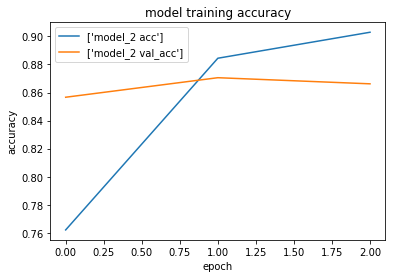

In [33]:
plt.plot(model_2_5.history['acc'])
plt.plot(model_2_5.history['val_acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') #訓練次數
plt.legend([['model_2 acc'],['model_2 val_acc']],loc='best')
plt.show()

In [34]:
score=model_2.evaluate(x_test,y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1]*100)

25000/25000 [==============================] - 31s 1ms/step
測試資料的 loss: 0.3107070927810669
測試資料正確率: 86.61999999999999
